<center>

## Universidad Nacional de Trujillo
<img src="logo.png" width="200"/> <!-- Ajusta el valor del ancho según necesites -->

### Energía de ligadura por nucleón en la Desintegración Beta

### Física Nuclear

#### Herrera Monteza Jherson Miguel
</center>




### Introducción a la Estabilidad Nuclear y la Energía de Ligadura

En el campo de la física nuclear, la estabilidad de un núcleo se determina por varios factores, siendo uno de los más significativos la energía de ligadura por nucleón. Esta energía es una medida de la fuerza con la que se mantienen unidos los protones y neutrones dentro del núcleo. Cuanto mayor sea la energía de ligadura por nucleón, más estable será el núcleo y menos propenso a desintegrarse.


Los núcleos que presentan la mayor energía de ligadura por nucleón se encuentran en el "valle de la estabilidad", una región que demarca los núcleos más estables conocidos en la naturaleza. La comprensión de la energía de ligadura es esencial para explicar por qué ciertos núcleos son más estables que otros y cómo los diferentes procesos nucleares, como la desintegración beta, afectan la estabilidad nuclear.

El código contenido en este cuaderno Jupyter se centra en la exploración de la estabilidad nuclear a través del análisis de la energía de ligadura por nucleón. Mediante análisis de datos, examinaremos cómo la energía de ligadura influye en la estabilidad de los núcleos y cómo la desintegración beta permite a los núcleos alcanzar un estado más estable. Esta aproximación nos permite profundizar en el entendimiento de las fuerzas fundamentales que modelan la estructura y la estabilidad del universo a nivel atómico.


### Implementación en python

En esta sección del código, comenzamos importando las bibliotecas necesarias para nuestro análisis y visualización de datos en el contexto de física nuclear:

- `pandas`: Una biblioteca de software escrita para el lenguaje de programación Python para la manipulación y análisis de datos. Utilizamos `pandas` para manejar grandes conjuntos de datos y realizar operaciones complejas con ellos de manera eficiente.

- `plotly.graph_objects`: Proporciona una interfaz de alto nivel para dibujar gráficos interactivos. Usamos esta biblioteca para crear visualizaciones dinámicas y atractivas que pueden ayudar a interpretar los resultados de nuestros análisis.

- `matplotlib.pyplot`: Una colección de funciones que hacen que matplotlib funcione como MATLAB, permitiendo a los usuarios crear gráficos y visualizaciones de datos estáticos, animados e interactivos en Python. Es ampliamente utilizado para la visualización de datos debido a su simplicidad y efectividad.

- `mpl_toolkits.mplot3d`: Un módulo de la biblioteca Matplotlib que proporciona herramientas para crear gráficos tridimensionales. Esto es particularmente útil en física nuclear para visualizar estructuras atómicas o distribuciones espaciales de partículas.


In [12]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Para graficar la energía de ligadura  $\varepsilon$ por nucleón-Superificie de energía, primero importamos los datos:

In [14]:
# Leer el archivo CSV
df = pd.read_csv("datos.csv")  # Cargamos los datos desde el archivo 'datos.csv' en un DataFrame de pandas llamado 'df'.
# Añadir una nueva columna al DataFrame
df['Masa_atomica'] = df['n'] + df['z']  # Calculamos la masa atómica sumando el número de neutrones 'n' y el número de protones 'z' para cada elemento en el DataFrame y almacenamos el resultado en una nueva columna llamada 'Masa_atomica'.

Primeramente los 10 primeros elementos de la tabla periódica:

In [18]:
# Filtrar los datos para elementos con número atómico Z de 1 a 10 (generalmente ligeros como Helio, Hidrógeno, etc.)
df_subset = df[df['z'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]

# Crear un diccionario para mapear el número atómico Z a los símbolos químicos de los elementos
z_to_symbol = {1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne'}

# Obtener los números atómicos únicos presentes en el subconjunto de datos
elementos = df_subset['z'].unique()

# Inicializar una figura 3D de Plotly para visualizar los datos
fig = go.Figure()

# Crear una lista para almacenar las coordenadas de los elementos con máxima energía de ligadura
max_energy_coordinates = []

# Iterar sobre cada elemento en el subconjunto y agregar sus datos a la figura 3D
for elemento in elementos:
    # Filtrar el DataFrame para obtener solo los datos del elemento actual
    df_elemento = df_subset[df_subset['z'] == elemento]
    # Encontrar el índice del dato con la máxima energía de ligadura
    idx_max_energy = df_elemento['bindingEnergy(keV)'].idxmax()
    # Obtener la masa atómica y el número atómico para el punto de máxima energía de ligadura
    max_A = df_elemento.loc[idx_max_energy, 'Masa_atomica']
    max_Z = df_elemento.loc[idx_max_energy, 'z']
    # Agregar estas coordenadas a la lista de máxima energía
    max_energy_coordinates.append((max_A, max_Z))

    # Agregar los datos del elemento actual a la figura como un trazado de dispersión 3D
    fig.add_trace(go.Scatter3d(
        x=df_elemento['Masa_atomica'],
        y=df_elemento['z'],
        z=df_elemento['bindingEnergy(keV)'],
        mode='lines+markers',  # Usar tanto líneas como marcadores
        name=f'{z_to_symbol[elemento]}',  # Nombre de la traza basada en el símbolo del elemento
        marker=dict(
            size=6,
            color=df_elemento['bindingEnergy(keV)'],  # Colorear los puntos según la energía de ligadura
            colorscale='Viridis',  # Escala de colores para los puntos
            opacity=0.9
        ),
        line=dict(width=2),
        text=[f"A: {a}" for a in df_elemento['Masa_atomica']],  # Texto a mostrar al pasar el mouse por los puntos
    ))

# Convertir la lista de máxima energía en un DataFrame para su visualización
df_max_energy = pd.DataFrame(max_energy_coordinates, columns=['Masa_atomica', 'z'])

# Agregar a la figura los puntos de máxima energía de ligadura para cada elemento
fig.add_trace(go.Scatter3d(
    x=df_max_energy['Masa_atomica'],
    y=df_max_energy['z'],
    z=[0 for _ in max_energy_coordinates],  # Establecer la coordenada z de estos puntos como 0 para que aparezcan en el plano XY
    mode='markers',
    name='Máxima Energía de Ligadura',
    hovertext=[f'Energía de Ligadura Máxima: {df.loc[(df["Masa_atomica"] == A) & (df["z"] == Z), "bindingEnergy(keV)"].values[0]} keV<br>Elemento: {z_to_symbol[Z]}' for A, Z in max_energy_coordinates],  # Texto para mostrar al pasar el mouse
    hoverinfo='text',  # Solo mostrar el texto personalizado al pasar el mouse
    marker=dict(
        size=10,
        color='red',
        symbol='circle',
        line=dict(width=2),
    ),
))

# Personalizar el diseño de la figura, incluyendo títulos de ejes y dimensiones de la figura
fig.update_layout(
    scene=dict(
        xaxis_title='Masa Atómica (A)',
        yaxis_title='Número Atómico (Z)',
        zaxis_title= '$\epsilon$ (keV)'
    ),
    title='Energía de Ligadura vs Masa Atómica y Número Atómico (Z)',
    legend=dict(title='Elemento Químico'),
    width=900,  # Ancho de la figura
    height=900,  # Alto de la figura
)

# Mostrar la figura interactiva
fig.show()


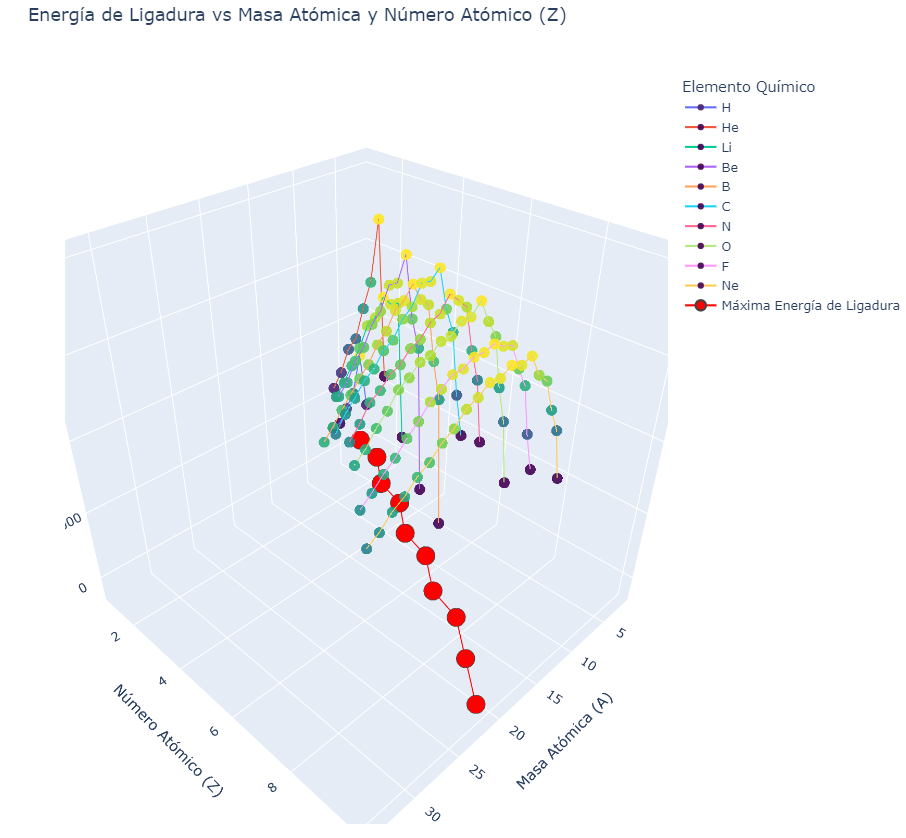

In [5]:
# Filtrar los datos para los 100 primeros elementos
df_subset = df[df['z'].isin(range(1, 119))]

# Crear un diccionario para mapear Z a símbolos de elementos
z_to_symbol = {
    1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne',
    11: 'Na', 12: 'Mg', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca',
    21: 'Sc', 22: 'Ti', 23: 'V', 24: 'Cr', 25: 'Mn', 26: 'Fe', 27: 'Co', 28: 'Ni', 29: 'Cu', 30: 'Zn',
    31: 'Ga', 32: 'Ge', 33: 'As', 34: 'Se', 35: 'Br', 36: 'Kr', 37: 'Rb', 38: 'Sr', 39: 'Y', 40: 'Zr',
    41: 'Nb', 42: 'Mo', 43: 'Tc', 44: 'Ru', 45: 'Rh', 46: 'Pd', 47: 'Ag', 48: 'Cd', 49: 'In', 50: 'Sn',
    51: 'Sb', 52: 'Te', 53: 'I', 54: 'Xe', 55: 'Cs', 56: 'Ba', 57: 'La', 58: 'Ce', 59: 'Pr', 60: 'Nd',
    61: 'Pm', 62: 'Sm', 63: 'Eu', 64: 'Gd', 65: 'Tb', 66: 'Dy', 67: 'Ho', 68: 'Er', 69: 'Tm', 70: 'Yb',
    71: 'Lu', 72: 'Hf', 73: 'Ta', 74: 'W', 75: 'Re', 76: 'Os', 77: 'Ir', 78: 'Pt', 79: 'Au', 80: 'Hg',
    81: 'Tl', 82: 'Pb', 83: 'Bi', 84: 'Po', 85: 'At', 86: 'Rn', 87: 'Fr', 88: 'Ra', 89: 'Ac', 90: 'Th',
    91: 'Pa', 92: 'U', 93: 'Np', 94: 'Pu', 95: 'Am', 96: 'Cm', 97: 'Bk', 98: 'Cf', 99: 'Es', 100: 'Fm', 101: 'Md', 102: 'No', 103: 'Lr', 104: 'Rf', 105: 'Db', 106: 'Sg', 107: 'Bh', 108: 'Hs',
    109: 'Mt', 110: 'Ds', 111: 'Rg', 112: 'Cn', 113: 'Nh', 114: 'Fl', 115: 'Mc', 116: 'Lv',
    117: 'Ts', 118: 'Og'
}
# Obtener los elementos únicos en df_subset
elementos = df_subset['z'].unique()

# Crear la figura 3D con un tamaño más grande
fig = go.Figure()

# Crear una lista para almacenar las coordenadas de masa (A) y número atómico (Z) de máxima energía de ligadura
max_energy_coordinates = []

# Iterar sobre los elementos y agregar las curvas
for elemento in elementos:
    df_elemento = df_subset[df_subset['z'] == elemento]
    # Encontrar el índice del máximo valor de energía de ligadura
    idx_max_energy = df_elemento['bindingEnergy(keV)'].idxmax()
    # Obtener las coordenadas de masa (A) y Z correspondientes al máximo
    max_A = df_elemento.loc[idx_max_energy, 'Masa_atomica']
    max_Z = df_elemento.loc[idx_max_energy, 'z']
    # Agregar las coordenadas a la lista
    max_energy_coordinates.append((max_A, max_Z))

    # Agregar puntos y líneas
    fig.add_trace(go.Scatter3d(
        x=df_elemento['Masa_atomica'],
        y=df_elemento['z'],
        z=df_elemento['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'{z_to_symbol[elemento]}',
        marker=dict(
            size=6,
            color=df_elemento['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"A: {a}" for a in df_elemento['Masa_atomica']],
    ))

# Convertir la lista en un DataFrame para visualización
df_max_energy = pd.DataFrame(max_energy_coordinates, columns=['Masa_atomica', 'z'])

# Agregar los puntos correspondientes a las coordenadas de máxima energía
fig.add_trace(go.Scatter3d(
    x=df_max_energy['Masa_atomica'],
    y=df_max_energy['z'],
    z=[0 for _ in max_energy_coordinates],  # Establecer eje z a cero para todos los puntos
    mode='lines+markers',
    name='Máxima Energía de Ligadura',
    hovertext=[f'Energía de Ligadura Máxima: {df.loc[(df["Masa_atomica"] == A) & (df["z"] == Z), "bindingEnergy(keV)"].values[0]} keV<br>Elemento: {z_to_symbol[Z]}' for A, Z in max_energy_coordinates],  # Agregar texto al pasar el mouse
    hoverinfo='text',  # Mostrar solo el texto personalizado
    marker=dict(
        size=6,
        color='red',
        symbol='circle',
        line=dict(width=2),
    ),
))

# Personalizar el diseño y ajustar el tamaño
fig.update_layout(
    scene=dict(
        xaxis_title='Masa Atómica (A)',
        yaxis_title='Número Atómico (Z)',
        zaxis_title='$\epsilon$ (keV)'
    ),
    title='Energía de Ligadura vs Masa Atómica y Número Atómico (Z)',
    legend=dict(title='Elemento Químico'),
    width=1200,  # Ancho de la figura
    height=900  # Alto de la figura
)

# Mostrar la gráfica interactiva
fig.show() 

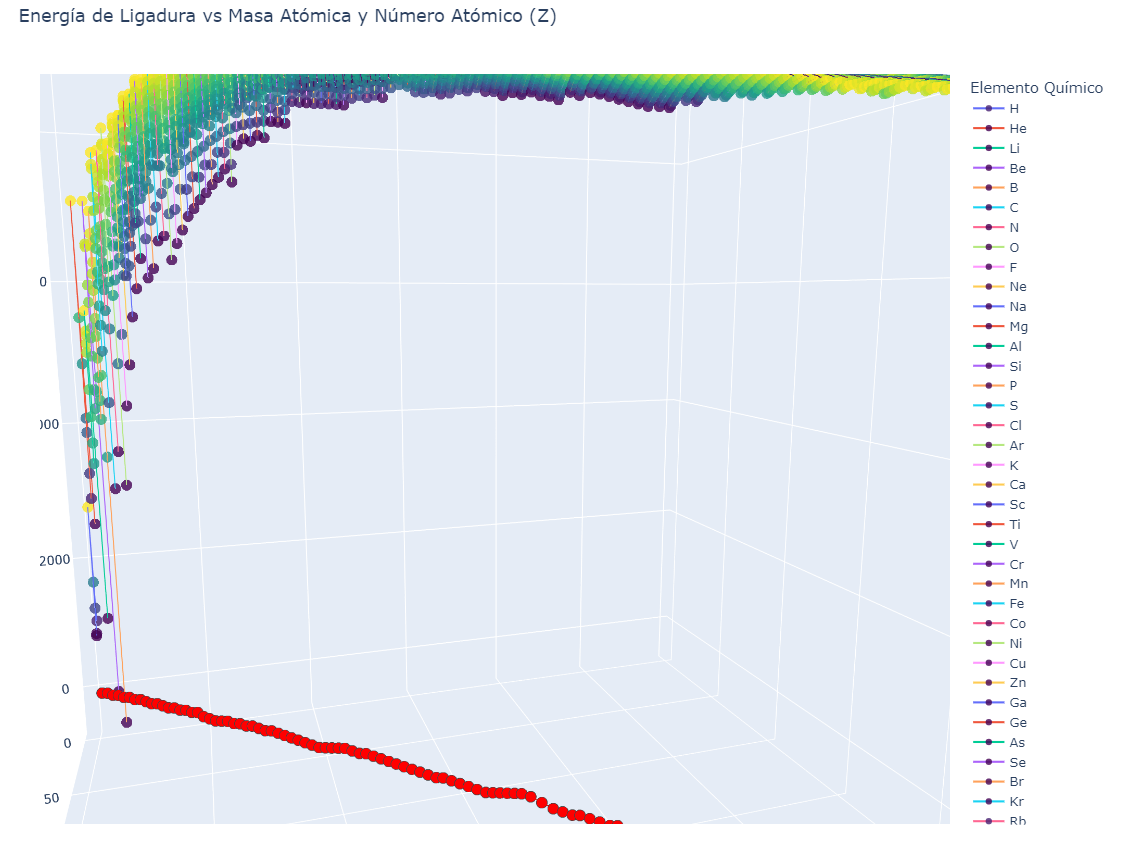

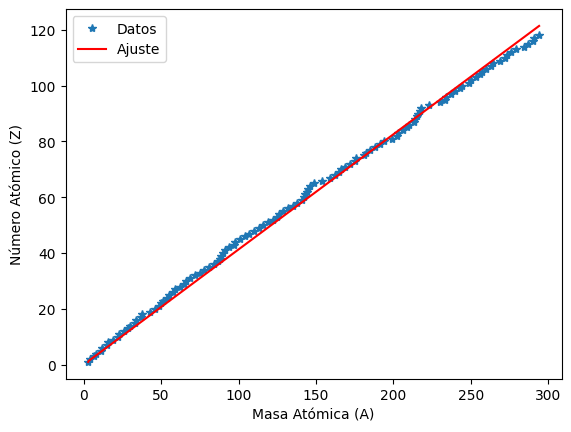

Coeficientes del ajuste: a = 2.421943676575552, b = 698387289226.8336, c = -25.32885060514969


In [6]:
import numpy as np
from scipy.optimize import curve_fit
Z_estable = df_max_energy['z'].astype(float).tolist()
Masa_estable = df_max_energy['Masa_atomica'].astype(float).tolist()
Z_estable = np.array(Z_estable)
Masa_estable = np.array(Masa_estable)
# Definir la función del modelo
def modelo(A, a, b, c):
    return A / (a+ b * (A**(c)))

# Realizar el ajuste
params, covariance = curve_fit(modelo, Masa_estable, Z_estable)

# Obtener los parámetros del ajuste
a, b, c = params

# Obtener el valor de A para tu función
A_fit = np.linspace(min(Masa_estable), max(Masa_estable), 1000)

# Calcular el valor de Z usando el modelo ajustado
Z_fit = modelo(A_fit, a, b,c)

# Graficar los datos y el ajuste
plt.plot(Masa_estable, Z_estable, '*', label='Datos')
plt.plot(A_fit, Z_fit, label='Ajuste', color='red')
plt.xlabel('Masa Atómica (A)')
plt.ylabel('Número Atómico (Z)')
plt.legend()
plt.show()

# Imprimir los coeficientes del ajuste
print(f'Coeficientes del ajuste: a = {a}, b = {b}, c = {c}')


In [7]:
from ipywidgets import interact, widgets


# Función para graficar el elemento seleccionado
def plot_element(selected_element):
    fig_elemento = go.Figure()

    df_elemento = df_subset[df_subset['z'] == selected_element]
    # Encontrar el índice del máximo valor de energía de ligadura
    idx_max_energy = df_elemento['bindingEnergy(keV)'].idxmax()
    max_A = df_elemento.loc[idx_max_energy, 'Masa_atomica']
    max_Z = df_elemento.loc[idx_max_energy, 'z']

    # Agregar puntos y líneas
    fig_elemento.add_trace(go.Scatter3d(
        x=df_elemento['Masa_atomica'],
        y=df_elemento['z'],
        z=df_elemento['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'{z_to_symbol[selected_element]}',
        marker=dict(
            size=6,
            color=df_elemento['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"A: {a}" for a in df_elemento['Masa_atomica']],
    ))

    # Agregar puntos correspondientes a las coordenadas de máxima energía
    fig_elemento.add_trace(go.Scatter3d(
        x=[max_A],
        y=[max_Z],
        z=[0],
        mode='lines+markers',
        name='Máxima Energía de Ligadura',
        hovertext=[f'Energía de Ligadura Máxima: {df.loc[(df["Masa_atomica"] == max_A) & (df["z"] == max_Z), "bindingEnergy(keV)"].values[0]} keV<br>Elemento: {z_to_symbol[selected_element]}'],  
        hoverinfo='text',
        marker=dict(
            size=6,
            color='red',
            symbol='circle',
            line=dict(width=2),
        ),
    ))

    fig_elemento.update_layout(
        scene=dict(
            xaxis_title='Masa Atómica (A)',
            yaxis_title='Número Atómico (Z)',
            zaxis_title='$\epsilon$ (keV)'
        ),
        title=f'Energía de Ligadura vs Masa Atómica y Número Atómico (Z) para {z_to_symbol[selected_element]}',
        width=1200,  # Ancho de la figura
        height=900  # Alto de la figura
    )

    fig_elemento.show()

# Crear un menú desplegable para seleccionar el elemento
# Crear un menú desplegable para seleccionar el elemento
element_selector = widgets.Dropdown(
    options=[(f'{key} - {z_to_symbol[key]}', key) for key in z_to_symbol.keys()],
    value=9,  # Valor por defecto (puedes cambiarlo según el elemento que quieras mostrar inicialmente)
    description='Elemento:'
)

# Conectar el selector de elementos con la función de graficar
interact(plot_element, selected_element=element_selector)


interactive(children=(Dropdown(description='Elemento:', index=8, options=(('1 - H', 1), ('2 - He', 2), ('3 - L…

<function __main__.plot_element(selected_element)>

In [8]:
from ipywidgets import interact, widgets

# Función para graficar los isóbaros
def plot_isobars(selected_mass):
    fig_isobars = go.Figure()

    df_isobars = df_subset[df_subset['Masa_atomica'] == selected_mass]

    # Agregar puntos y líneas
    fig_isobars.add_trace(go.Scatter3d(
        x=df_isobars['Masa_atomica'],
        y=df_isobars['z'],
        z=df_isobars['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'Masa: {selected_mass}',
        marker=dict(
            size=6,
            color=df_isobars['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"Elemento: {z_to_symbol[z]}" for z in df_isobars['z']],
    ))

    fig_isobars.update_layout(
        scene=dict(
            xaxis_title='Masa Atómica (A)',
            yaxis_title='Número Atómico (Z)',
            zaxis_title='$\epsilon$ (keV)'
        ),
        title=f'Energía de Ligadura vs Masa Atómica y Número Atómico (Z) para Masa: {selected_mass}',
        width=1200,  # Ancho de la figura
        height=900  # Alto de la figura
    )

    fig_isobars.show()

# Crear un menú desplegable para seleccionar la masa
mass_selector = widgets.Dropdown(
    options=df_subset['Masa_atomica'].unique(),
    value=50,  # Valor por defecto (puedes cambiarlo según la masa que quieras mostrar inicialmente)
    description='Masa Atómica:'
)

# Conectar el selector de masas con la función de graficar isóbaros
interact(plot_isobars, selected_mass=mass_selector)


interactive(children=(Dropdown(description='Masa Atómica:', index=48, options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11,…

<function __main__.plot_isobars(selected_mass)>

In [9]:
def Energia_ligadura(A, Z, Masa_atomica): # en MeV
    # definimos las constantes
    masa_proton = 1.007825 # masa de un protón  en uma
    masa_neutron = 1.008665 # masa de un netrón en uma
    # Fórmula de la energía de ligadura
    energia = (Z*masa_proton + (A-Z)*masa_neutron - Masa_atomica)*931.5 # energía de ligadura en uma
    # redondeamos el resultado a 6 decimales
    energia_redondeada = round(energia, 6)
    # retornamos el resultado
    return energia_redondeada


In [10]:
# Función para graficar los isóbaros
def plot_isobars(selected_mass):
    fig_isobars = go.Figure()

    df_isobars = df_subset[df_subset['Masa_atomica'] == selected_mass]

    # Agregar puntos y líneas
    fig_isobars.add_trace(go.Scatter3d(
        x=df_isobars['Masa_atomica'],
        y=df_isobars['z'],
        z=df_isobars['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'Masa: {selected_mass}',
        marker=dict(
            size=6,
            color=df_isobars['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"Elemento: {z_to_symbol[z]}, Energía: {energy} keV" for z, energy in zip(df_isobars['z'], df_isobars['bindingEnergy(keV)'])],
    ))

    # Agregar un plano con los puntos de igual masa
    fig_isobars.add_trace(go.Surface(
        x=df_isobars['Masa_atomica'],
        y=df_isobars['z'],
        z=df_isobars['bindingEnergy(keV)'],
        cmin=0, cmax=df_isobars['bindingEnergy(keV)'].max(),
        colorscale='Viridis',
        showscale=False
    ))

    fig_isobars.update_layout(
        scene=dict(
            xaxis_title='Masa Atómica (A)',
            yaxis_title='Número Atómico (Z)',
            zaxis_title='$\epsilon$ (keV)'
        ),
        title=f'Energía de Ligadura vs Masa Atómica y Número Atómico (Z) para Masa: {selected_mass}',
        width=1200,  # Ancho de la figura
        height=900  # Alto de la figura
    )

    fig_isobars.show()

# Crear un menú desplegable para seleccionar la masa
mass_selector = widgets.Dropdown(
    options=df_subset['Masa_atomica'].unique(),
    value=50,  # Valor por defecto (puedes cambiarlo según la masa que quieras mostrar inicialmente)
    description='Masa Atómica:'
)

# Conectar el selector de masas con la función de graficar isóbaros
interact(plot_isobars, selected_mass=mass_selector)


interactive(children=(Dropdown(description='Masa Atómica:', index=48, options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11,…

<function __main__.plot_isobars(selected_mass)>